In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path
sys.path.append('..')

import pickle
import json

# Script params

In [3]:
max_len = 150
embedding_dim = 16

# Load train and test data

In [4]:
from keras.utils import pad_sequences

2023-08-13 23:19:14.007043: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
with open('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/corpus_train_df.pkl', 'rb') as f:
    train_df = pickle.load(f)
with open('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/corpus_test_df.pkl', 'rb') as f:
    test_df = pickle.load(f)
with open('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/token2index.json', 'r') as f:
    token2index = json.load(f)
with open('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/index2token.json', 'r') as f:
    index2token = json.load(f)

In [6]:
max_index = max(list(token2index.values())) + 1

In [7]:
x_train = pad_sequences(train_df.token_indexes.values, maxlen = max_len)
y_train = train_df.labels.values
x_test = pad_sequences(test_df.token_indexes.values, maxlen = max_len)
y_test = test_df.labels.values

In [8]:
x_train.shape, y_train.shape

((25000, 150), (25000,))

In [9]:
x_test.shape, y_test.shape

((25000, 150), (25000,))

# Training simple dnn with embedding layer

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, LSTM
from keras.metrics import AUC, BinaryAccuracy
from keras.optimizers import RMSprop

In [11]:
model = Sequential()
model.add(Embedding(max_index, embedding_dim))
model.add(LSTM(32))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

2023-08-13 23:19:22.242941: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-13 23:19:22.244430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-13 23:19:22.246297: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [12]:
optimizer = RMSprop(learning_rate=0.0001, momentum = 0.3)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[BinaryAccuracy(), AUC()])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          277472    
                                                                 
 lstm (LSTM)                 (None, 32)                6272      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 284,017
Trainable params: 284,017
Non-trainable params: 0
_________________________________________________________________


In [14]:
fit_history = model.fit(x_train,
                        y_train,
                        epochs=15,
                        batch_size=64,
                        validation_data=(x_test, y_test)
                       )

Epoch 1/15


2023-08-13 23:19:22.946706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-13 23:19:22.948541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-13 23:19:22.949858: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

391/391 [==============================] - ETA: 0s - loss: 0.6895 - binary_accuracy: 0.5700 - auc: 0.6199

2023-08-13 23:19:41.083975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-13 23:19:41.085248: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-13 23:19:41.086536: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

391/391 [==============================] - 23s 55ms/step - loss: 0.6895 - binary_accuracy: 0.5700 - auc: 0.6199 - val_loss: 0.6781 - val_binary_accuracy: 0.6069 - val_auc: 0.7895
Epoch 2/15
391/391 [==============================] - 22s 56ms/step - loss: 0.5907 - binary_accuracy: 0.7441 - auc: 0.8247 - val_loss: 0.5290 - val_binary_accuracy: 0.8162 - val_auc: 0.8842
Epoch 3/15
391/391 [==============================] - 20s 52ms/step - loss: 0.4654 - binary_accuracy: 0.8283 - auc: 0.8871 - val_loss: 0.4168 - val_binary_accuracy: 0.8415 - val_auc: 0.9066
Epoch 4/15
391/391 [==============================] - 20s 52ms/step - loss: 0.3760 - binary_accuracy: 0.8644 - auc: 0.9220 - val_loss: 0.3661 - val_binary_accuracy: 0.8516 - val_auc: 0.9287
Epoch 5/15
391/391 [==============================] - 21s 53ms/step - loss: 0.3250 - binary_accuracy: 0.8842 - auc: 0.9388 - val_loss: 0.3394 - val_binary_accuracy: 0.8585 - val_auc: 0.9326
Epoch 6/15
391/391 [==============================] - 21s 53m

In [15]:
from kst.plots.BasePlots import BasePlots, ScatterPlot
import pandas as pd
from plotnine import aes, geom_point, geom_line, ylim, labs, theme

In [16]:
df = pd.DataFrame.from_dict(fit_history.history)
df['epoch'] = df.index.to_list()
df

,loss,binary_accuracy,auc,val_loss,val_binary_accuracy,val_auc,epoch
0,0.689501,0.56996,0.619934,0.678110,0.60688,0.789538,0
1,0.590705,0.74408,0.824730,0.528972,0.81616,0.884170,1
2,0.465406,0.82832,0.887146,0.416790,0.84148,0.906551,2
3,0.376019,0.86440,0.922025,0.366052,0.85160,0.928743,3
4,0.324951,0.88420,0.938843,0.339421,0.85852,0.932551,4
5,0.292256,0.89780,0.948979,0.322946,0.86472,0.937734,5
6,0.266727,0.90708,0.956701,0.324411,0.86772,0.937665,6
7,0.247976,0.91596,0.961902,0.324430,0.86980,0.938897,7
8,0.230351,0.92380,0.966445,0.331220,0.87032,0.939047,8
9,0.218014,0.92988,0.969341,0.327916,0.87020,0.940660,9


In [17]:
sc = ScatterPlot(data_set=df,
                 aes = {'x':'epoch', 'y':'loss', 'color':"'training'"},
                 main_title='Binary crossentropy',
                 x_label='Epoch',
                 y_label='Loss',
                 legend_title='',
                 line = geom_line()
              )

sc.add_gg_object(geom_point(df, aes(x = 'epoch', y = 'val_loss', color = "'validation'")))
sc.add_gg_object(geom_line(df, aes(x = 'epoch', y = 'val_loss', color = "'validation'")))

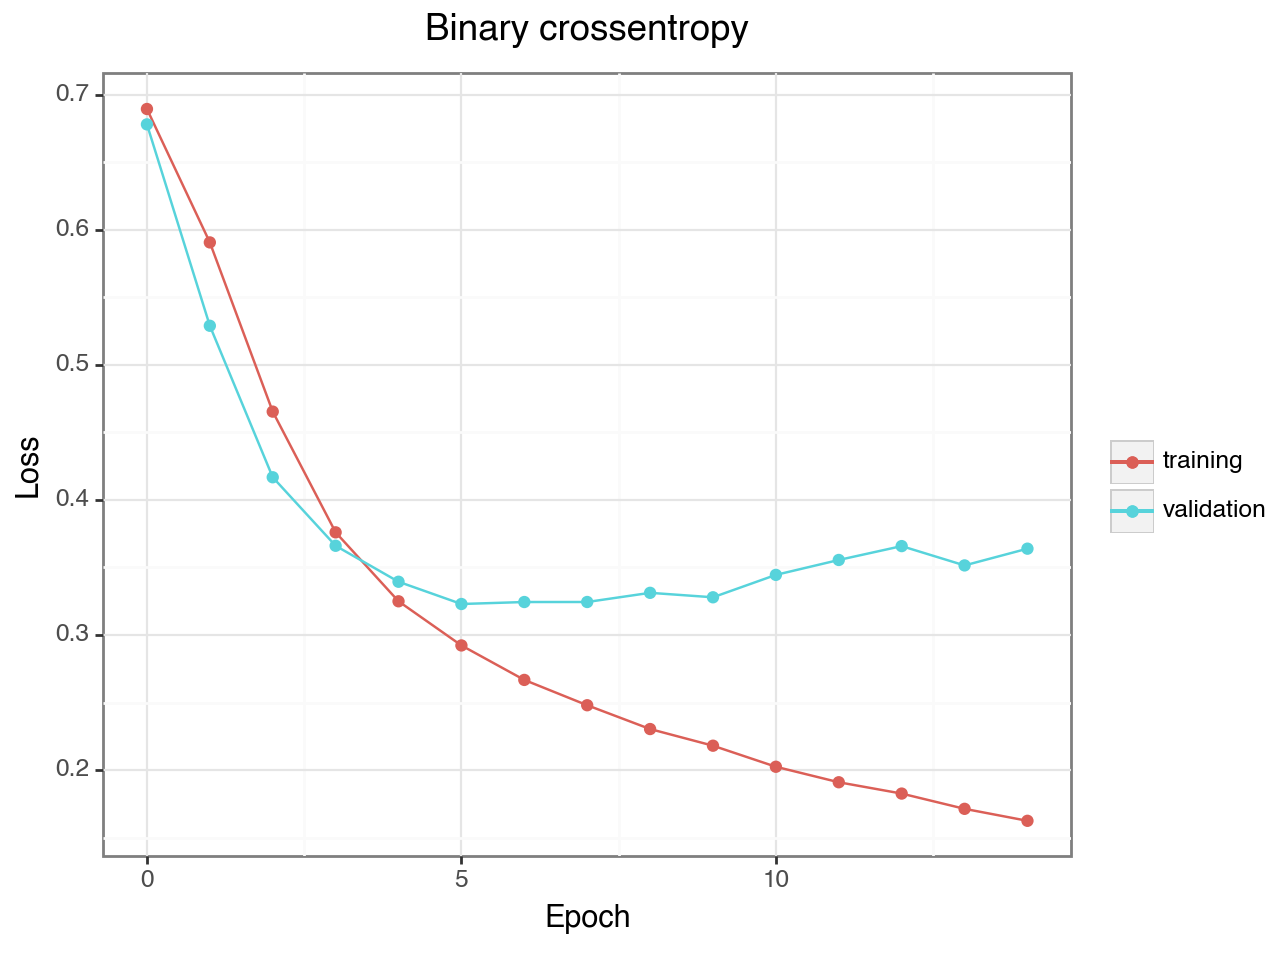

<Figure Size: (640 x 480)>

In [18]:
sc.plot

In [19]:
sc = ScatterPlot(data_set=df,
                 aes = {'x':'epoch', 'y':'auc', 'color':"'training'"},
                 main_title='Area under curve',
                 x_label='Epoch',
                 y_label='Binary accuracy',
                 legend_title='',
                 line = geom_line()
              )

sc.add_gg_object(geom_point(df, aes(x = 'epoch', y = 'val_auc', color = "'validation'")))
sc.add_gg_object(geom_line(df, aes(x = 'epoch', y = 'val_auc', color = "'validation'")))

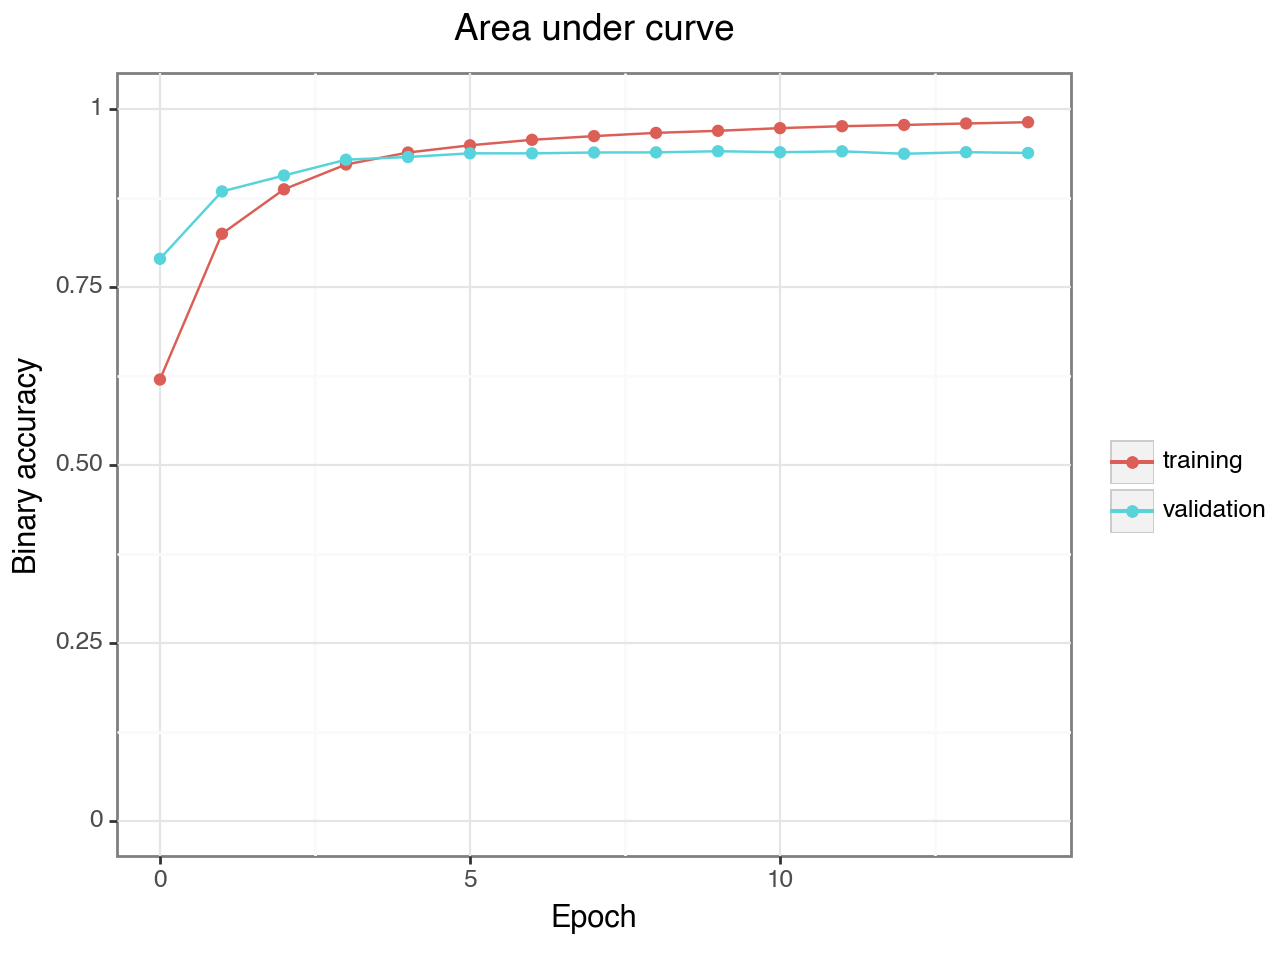

<Figure Size: (640 x 480)>

In [20]:
sc.plot + ylim(0,1)

In [21]:
sc = ScatterPlot(data_set=df,
                 aes = {'x':'epoch', 'y':'binary_accuracy', 'color':"'training'"},
                 main_title='Binarry accuracy',
                 x_label='Epoch',
                 y_label='Binary accuracy',
                 legend_title='',
                 line = geom_line()
              )

sc.add_gg_object(geom_point(df, aes(x = 'epoch', y = 'val_binary_accuracy', color = "'validation'")))
sc.add_gg_object(geom_line(df, aes(x = 'epoch', y = 'val_binary_accuracy', color = "'validation'")))

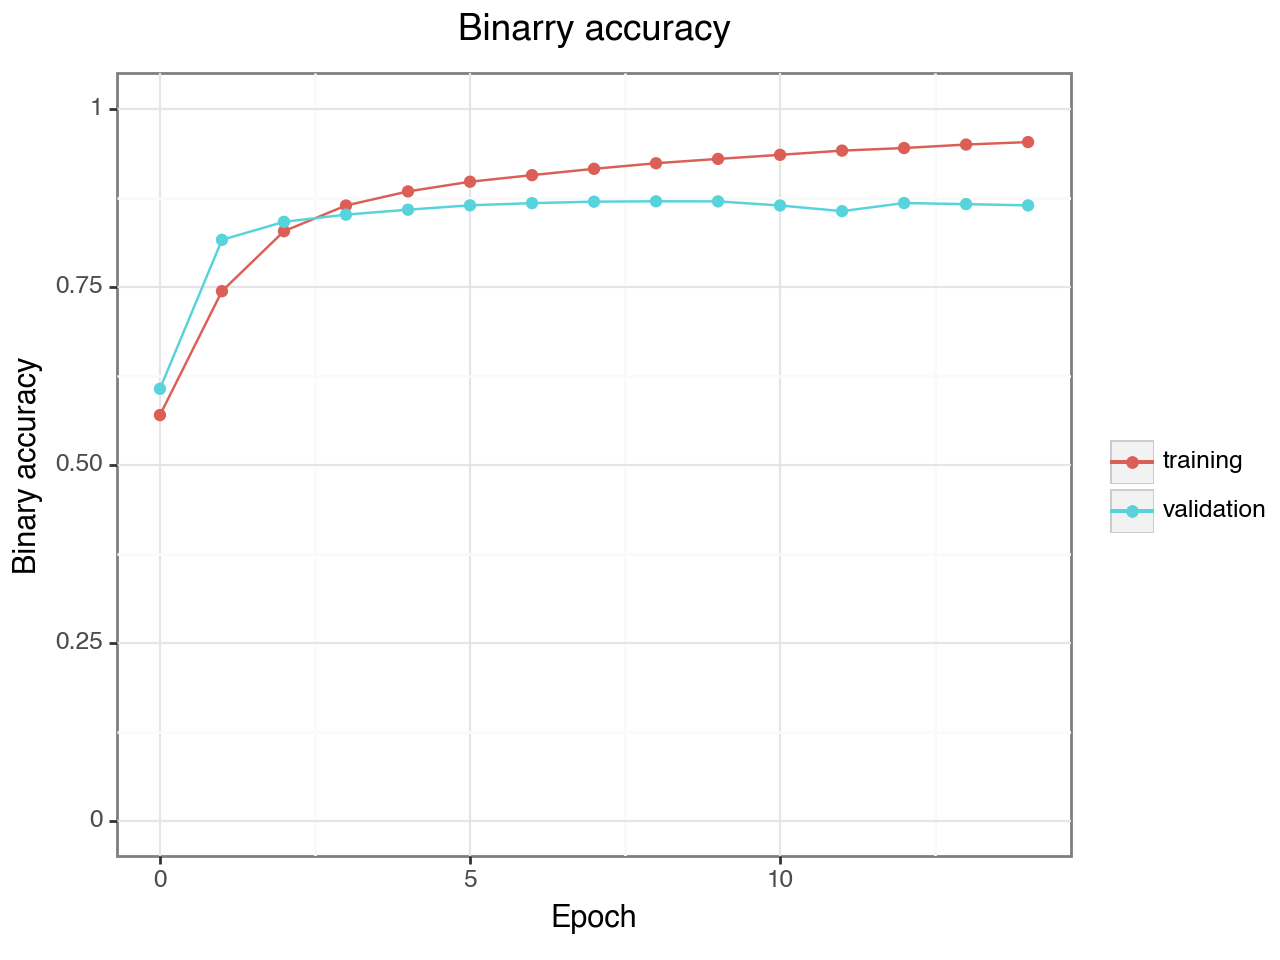

<Figure Size: (640 x 480)>

In [22]:
sc.plot + ylim(0,1)

# Extract embeddings

In [23]:
embedding_vectors = model.layers[0].weights[0]

In [24]:
token2vector = {}
for index, vector in enumerate(embedding_vectors):
    token2vector[index2token.get(str(index))] = vector.numpy()

In [25]:
token2vector_df = pd.DataFrame.from_dict({'token':list(token2vector.keys()), 'em_vector': list(token2vector.values())})

In [26]:
token2vector_df

,token,em_vector
0,aag,"[-0.012159012, -0.027856246, 0.026184184, -0.0..."
1,aaron,"[0.03950376, -0.027385741, 0.036806777, -0.036..."
2,ab,"[0.037222486, -0.02226049, 0.011729901, -0.033..."
3,abandon,"[0.021350864, -0.03322951, 0.05255815, 0.06158..."
4,abandoned,"[-0.059855614, 0.0024626446, 0.012589296, 0.00..."
...,...,...
17337,zu,"[-0.011183418, 0.026846545, 0.021498052, -0.03..."
17338,zucker,"[0.04245151, 0.033911303, -0.035417724, 0.0399..."
17339,zulu,"[-0.007463065, 0.02092202, 0.009323561, -0.009..."
17340,zuniga,"[0.042647943, 0.008793005, 0.017448328, -0.002..."


In [27]:
token2vector_tsne = pd.DataFrame.from_dict(token2vector, orient='index')

In [28]:
token2vector_tsne

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
aag,-0.012159,-0.027856,0.026184,-0.003588,0.034746,-0.003004,-0.028622,-0.060200,0.040582,-0.014436,0.010919,-0.014999,0.015680,-0.038458,0.015624,-0.032217
aaron,0.039504,-0.027386,0.036807,-0.036423,0.000615,-0.034206,0.034997,-0.042792,-0.032860,-0.017044,-0.001688,-0.005340,-0.031251,0.007598,-0.020031,-0.015859
ab,0.037222,-0.022260,0.011730,-0.033851,0.015963,-0.020438,0.021298,-0.040837,0.019143,-0.007903,-0.011031,-0.006195,0.045672,0.033081,-0.034857,0.002902
abandon,0.021351,-0.033230,0.052558,0.061589,-0.018731,0.035048,0.036039,0.044210,0.000997,0.023990,-0.034325,0.029761,-0.028864,-0.030160,-0.014923,-0.005792
abandoned,-0.059856,0.002463,0.012589,0.000365,-0.015384,0.011931,0.028877,0.036934,-0.025911,-0.009229,-0.015181,-0.043613,-0.019851,0.023001,0.023517,0.040249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zu,-0.011183,0.026847,0.021498,-0.033155,-0.016569,-0.038369,-0.018064,-0.003596,0.054694,-0.025892,-0.047223,-0.060139,0.027362,-0.009213,-0.032530,-0.014289
zucker,0.042452,0.033911,-0.035418,0.039974,0.044587,-0.013000,0.005204,-0.047631,0.017949,-0.004408,0.019119,-0.011554,-0.042863,-0.034711,0.002181,-0.031872
zulu,-0.007463,0.020922,0.009324,-0.009336,-0.015579,0.053833,-0.007506,-0.015267,0.024883,0.043708,-0.000777,-0.002091,0.025940,-0.052323,0.001861,0.018077
zuniga,0.042648,0.008793,0.017448,-0.002475,-0.009590,-0.053306,-0.037531,0.009845,0.046710,0.002055,-0.003602,-0.009369,0.003405,0.051903,-0.038311,-0.034783


In [29]:
from sklearn.manifold import TSNE

In [30]:
tsne_transformer = TSNE(n_components=2, verbose=1, random_state=123)

In [31]:
z = tsne_transformer.fit_transform(token2vector_tsne) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17342 samples in 0.002s...
[t-SNE] Computed neighbors for 17342 samples in 1.289s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17342
[t-SNE] Computed conditional probabilities for sample 2000 / 17342
[t-SNE] Computed conditional probabilities for sample 3000 / 17342
[t-SNE] Computed conditional probabilities for sample 4000 / 17342
[t-SNE] Computed conditional probabilities for sample 5000 / 17342
[t-SNE] Computed conditional probabilities for sample 6000 / 17342
[t-SNE] Computed conditional probabilities for sample 7000 / 17342
[t-SNE] Computed conditional probabilities for sample 8000 / 17342
[t-SNE] Computed conditional probabilities for sample 9000 / 17342
[t-SNE] Computed conditional probabilities for sample 10000 / 17342
[t-SNE] Computed conditional probabilities for sample 11000 / 17342
[t-SNE] Computed conditional probabilities for sample 12000 / 17342
[t-SNE] Computed conditional probabilities for sam

In [32]:
token2vector_tsne['comp-0'] = z[:,0]
token2vector_tsne['comp-1'] = z[:,1]

In [33]:
list_of_animals = [animal.lower() for animal in pd.read_csv("/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/animals.csv").name.to_list()]

In [49]:
tsne_df = token2vector_tsne.sample(n=5000).reset_index()
# tsne_df = token2vector_tsne.reset_index()
tsne_df.rename(columns={'index':'token'}, inplace=True)
tsne_df['labels'] = 'background'
tsne_df.loc[[x in list_of_animals for x in tsne_df.token],['labels']]  = 'animals'

In [50]:
tsne_df

,token,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,comp-0,comp-1,labels
0,tossed,0.040381,-0.062963,-0.012243,0.013885,-0.056070,0.010375,-0.012244,0.060692,-0.019782,-0.011601,-0.001568,0.051885,-0.014075,-0.024741,-0.023231,-0.020491,62.812836,0.994522,background
1,bygone,0.025020,0.025590,0.023250,-0.029175,0.002146,0.028492,-0.037099,-0.050055,0.040513,-0.024638,-0.037150,0.018169,-0.023092,0.045955,-0.042573,0.022337,-53.316639,26.528841,background
2,exuberant,0.004558,0.055935,0.004803,0.024741,0.011814,-0.002716,0.059684,0.006713,-0.028697,0.007942,0.019093,0.007806,0.050285,0.046877,0.005138,0.028851,-14.031227,-25.658947,background
3,craziness,0.036868,0.002415,-0.038553,-0.014077,0.008852,-0.032602,0.012872,-0.024873,0.025928,-0.049877,0.001105,0.019951,-0.034419,0.015766,-0.044357,0.018205,-22.228411,-11.275768,background
4,pondering,-0.019456,-0.033139,-0.019000,0.005776,0.021688,0.002968,0.032938,0.002971,-0.011921,-0.041566,-0.027464,0.028626,-0.012106,0.018987,0.003939,-0.041550,-3.052607,42.011200,background
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,text,0.001580,0.047172,-0.029531,-0.026907,0.000774,-0.031146,-0.008579,0.001828,-0.022715,0.017243,-0.014009,-0.015142,0.001908,0.010852,0.007250,-0.004482,27.079805,-25.765408,background
4996,nan,-0.021310,-0.019232,0.007292,0.029492,-0.005296,0.032384,-0.025561,0.011087,-0.019084,-0.035313,0.036683,-0.031913,0.000057,-0.006322,-0.052799,-0.030091,7.407527,-11.826589,background
4997,waiter,-0.050726,-0.028789,-0.005522,0.005177,-0.006848,-0.014468,-0.022552,-0.048818,0.035977,-0.020218,-0.049569,0.028013,0.035400,-0.015593,-0.021377,0.021143,-47.789188,19.341192,background
4998,ranger,-0.005676,0.007347,0.018305,-0.005284,0.030262,0.020136,0.041576,-0.011777,-0.034101,-0.024939,-0.023122,-0.028131,-0.016307,0.005742,-0.035279,-0.045601,-72.344032,40.383953,background


In [51]:
sc = ScatterPlot(data_set=tsne_df,
                 aes = {'x':'comp-0', 'y':'comp-1', 'color':'labels'},
                 points_features={'alpha':0.2},
                 main_title='Binarry accuracy',
                 x_label='Epoch',
                 y_label='Binary accuracy',
                 legend_title=''
              )

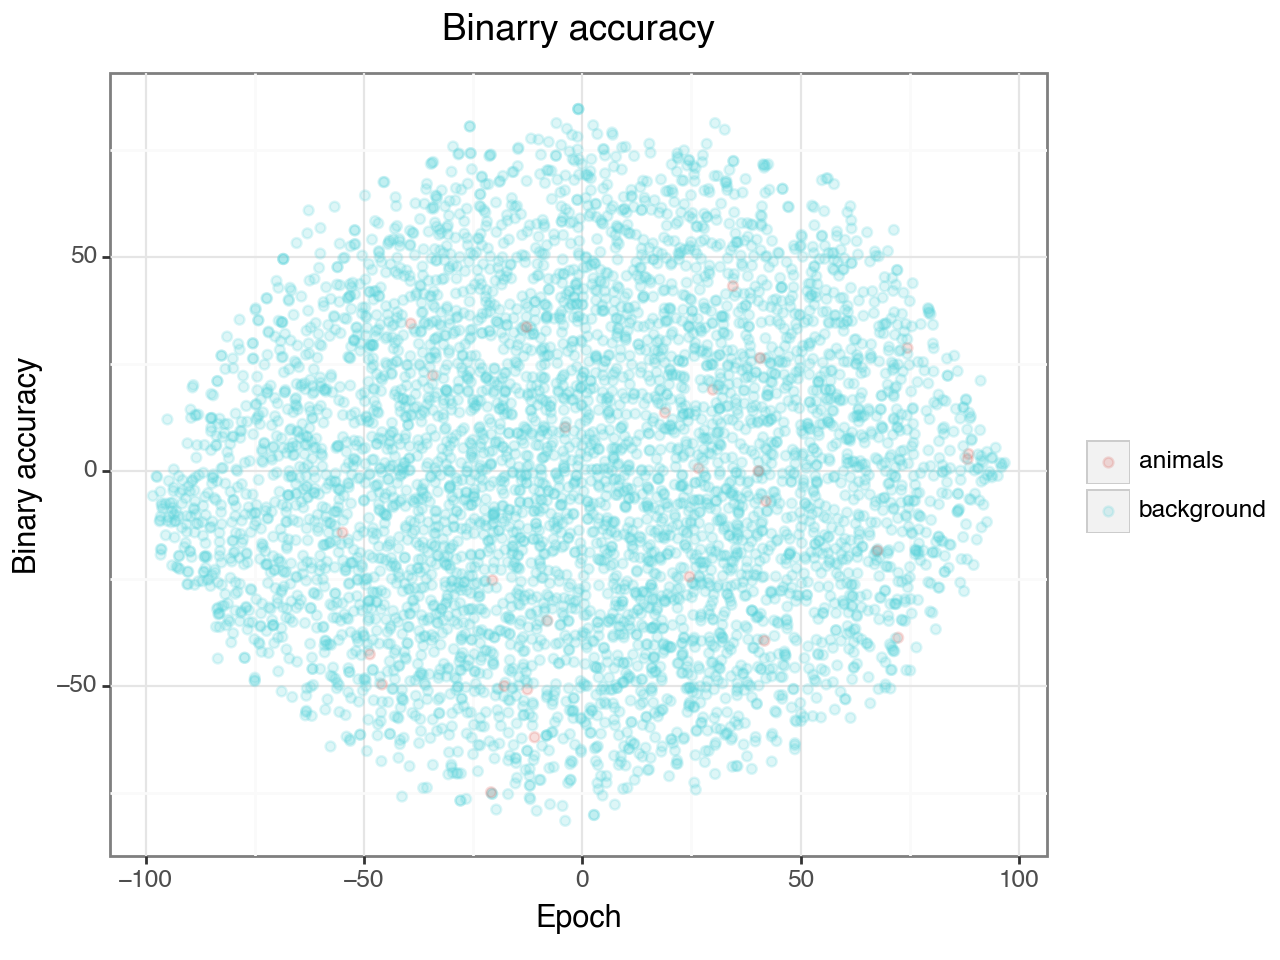

<Figure Size: (640 x 480)>

In [52]:
sc.plot

In [53]:
sc = ScatterPlot(data_set=tsne_df[tsne_df.labels == 'animals'],
                 aes = {'x':'comp-0', 'y':'comp-1', 'color':'token'},
                 points_features={'alpha':0.2},
                 main_title='Binarry accuracy',
                 x_label='Epoch',
                 y_label='Binary accuracy',
                 legend_title=''
              )

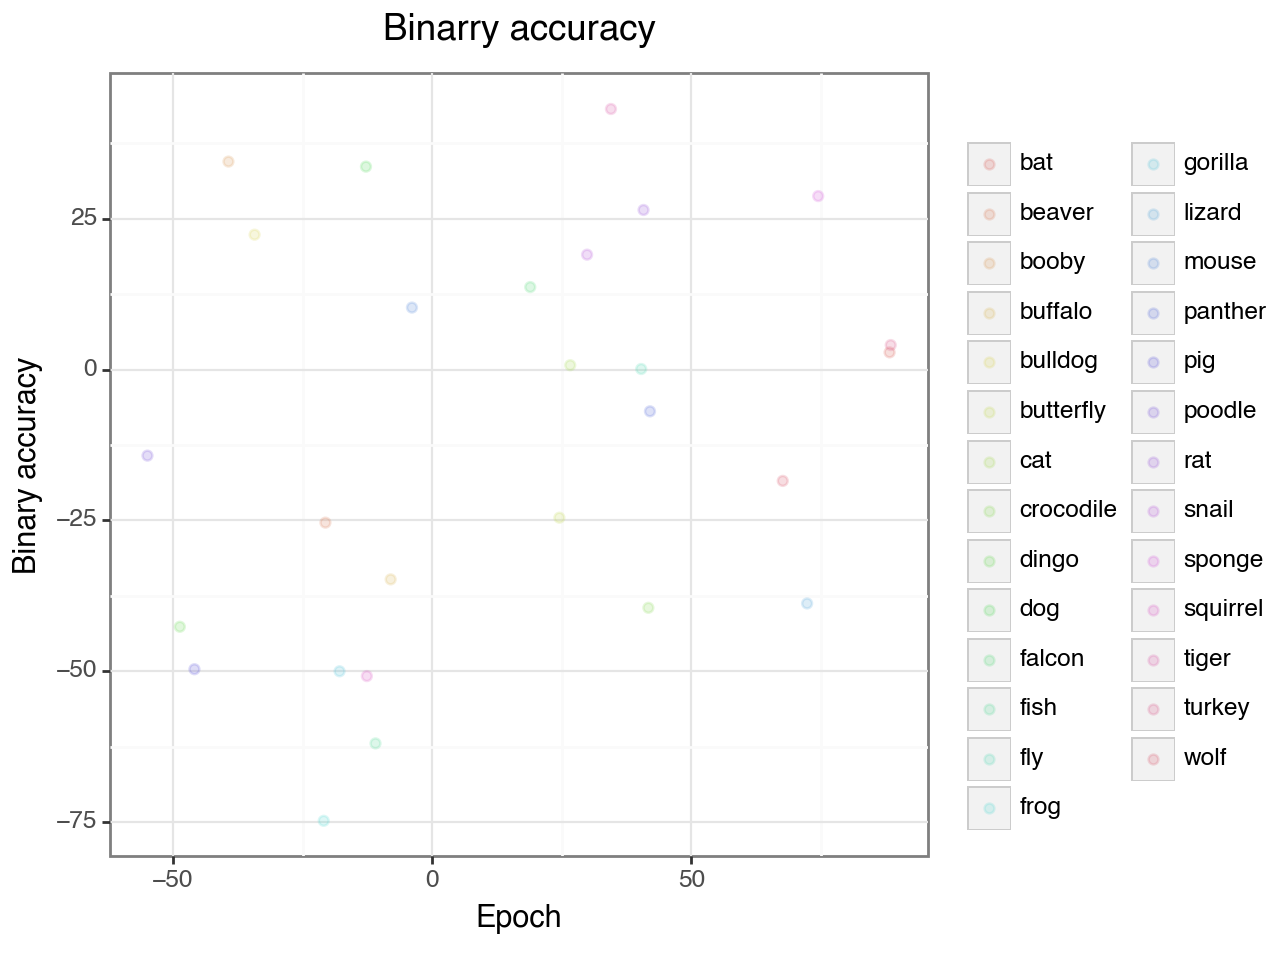

<Figure Size: (640 x 480)>

In [54]:
sc.plot

In [55]:
tsne_df[tsne_df.labels == 'animals'].sort_values(by = ['comp-0', 'comp-1'])

,token,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,comp-0,comp-1,labels
4872,poodle,0.028724,0.039133,0.036601,0.019704,-0.026080,-0.001076,0.049734,-0.011771,0.013067,0.025468,0.006687,-0.040241,0.025970,0.012586,-0.018634,0.034837,-54.927174,-14.251902,animals
3611,dingo,0.041505,0.044723,-0.008824,0.035634,-0.031249,0.013901,-0.009796,-0.024532,0.050723,-0.013687,-0.024119,-0.020290,-0.019256,0.007015,0.000403,-0.007958,-48.681488,-42.612312,animals
993,pig,-0.018584,-0.014992,-0.005698,-0.033920,-0.044702,-0.033506,-0.010061,-0.035570,0.033160,-0.006224,-0.018044,-0.012059,0.025600,0.036218,-0.041923,-0.018904,-45.863949,-49.649357,animals
2356,booby,-0.019325,-0.005060,0.042273,-0.034250,-0.022939,-0.035188,0.006869,0.012745,0.018940,-0.047921,0.033357,0.036786,-0.014624,0.049962,0.033501,0.042354,-39.301479,34.473984,animals
560,bulldog,-0.022252,0.026347,0.043053,-0.016429,-0.038681,0.034842,0.039348,0.024818,0.011215,-0.018442,0.011215,0.032660,-0.025887,0.028024,-0.006863,0.020864,-34.259064,22.361919,animals
4111,frog,0.008763,0.048431,-0.032310,0.046139,0.000593,-0.022088,-0.005266,-0.001009,-0.039157,-0.051902,-0.012038,-0.053204,-0.032873,-0.038580,0.002261,0.027726,-20.920792,-74.770500,animals
971,beaver,0.039893,-0.017760,0.015914,0.014527,-0.033292,-0.032736,0.004191,0.035926,-0.019642,-0.035487,-0.045575,-0.051256,0.033847,-0.034509,-0.027078,-0.010408,-20.592947,-25.359472,animals
3375,gorilla,-0.028263,0.021096,-0.047650,0.038878,-0.010975,-0.017001,-0.019926,0.041965,-0.012758,-0.005104,0.051975,-0.013072,0.028008,0.026447,-0.032253,0.012170,-17.868261,-49.989506,animals
2725,dog,-0.052851,0.000442,0.040323,0.014904,0.030881,0.000331,-0.004379,0.004278,-0.045257,-0.024564,-0.016293,0.038155,0.024228,-0.001464,0.030777,-0.005431,-12.772142,33.637054,animals
1045,squirrel,-0.001539,0.041545,-0.017660,0.010595,-0.029197,-0.049503,-0.007308,0.019618,-0.028455,-0.014497,-0.008728,0.006233,0.005087,0.032373,-0.047125,0.020758,-12.601621,-50.787159,animals
